# FE620 Group Work Project 1 - Student Group 3856

Group Members:
1. Wei Wee Law
2. Pang Chern Hong
3. Arsalan Hussain


# Introduction

In this project, we have been tasked to demostrate one of the most important concept encountered in Derivative Pricing. The task allocation are as follow:
1. Team Member A: Pang Chern Hong
2. Team Member B: Wei Wee Law
3. Team Member C: Arsalan Hussain


In [52]:
import numpy as np
import pandas as pd
import scipy.stats as ss
from scipy.stats import norm
import matplotlib.pyplot as plt

In [53]:
pip install tabulate

# Step 1

S0 = 100; r = 5%, sigma = 20%; T = 3 months

## Q1: European Option Pricing using Black-Scholes closed-form solution

In [54]:
def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    return res

In [55]:
def bs_put_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(K-S, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm 
    d_minus /= vol  #d2

    d_plus = d_minus + vol #d1

    res = K * np.exp(-r * ttm) * norm.cdf(-d_minus)
    res -= S * norm.cdf(-d_plus)

    return res

In [108]:
#ATM: Strike Price = Stock Price 
bs_call = bs_call_price(100, 0.05, 0.2, 0, 3/12, 100)
bs_put = bs_put_price(100, 0.05, 0.2, 0, 3/12, 100)

print("BS Analytical Price for European Call Option is $ {:.2f}".format(bs_call))
print("BS Analytical Price for European Put Option is $ {:.2f}".format(bs_put))

BS Analytical Price for European Call Option is $ 4.61
BS Analytical Price for European Put Option is $ 3.37


In [109]:
#To calculate Greek of the data:
T = 3/12 # in years. time to maturity
S = 100.0
K = 100.0
r = 0.05
vol = 0.20  # supposing it is annual
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

option_type = "C"
if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("The Greek of the European Call Option:")
print("1. Sensitivity to Underlying Stock Price (Delta) = {:.4f}".format(Delta))
print("2. Sensitivity to Changes in Underlying Stock Price (Gamma) = {:.4f}".format(Gamma))
print("3. Sensitivity to Volatility (Vega) = {:.4f}".format(Vega))
print("4. Sensitivity to Time (Theta) = {:.4f}".format(Theta))
print("5. Sensitivity to Risk-Free Rate (Rho) = {:.4f}".format(Rho))
print("\n")

option_type = "P"
if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("The Greek of the European Put Option:")
print("1. Sensitivity to Underlying Stock Price (Delta) = {:.4f}".format(Delta))
print("2. Sensitivity to Changes in Underlying Stock Price (Gamma) = {:.4f}".format(Gamma))
print("3. Sensitivity to Volatility (Vega) = {:.4f}".format(Vega))
print("4. Sensitivity to Time (Theta) = {:.4f}".format(Theta))
print("5. Sensitivity to Risk-Free Rate (Rho) = {:.4f}".format(Rho))

The Greek of the European Call Option:
1. Sensitivity to Underlying Stock Price (Delta) = 0.5695
2. Sensitivity to Changes in Underlying Stock Price (Gamma) = 0.0393
3. Sensitivity to Volatility (Vega) = 19.6440
4. Sensitivity to Time (Theta) = -10.4742
5. Sensitivity to Risk-Free Rate (Rho) = 13.0828


The Greek of the European Put Option:
1. Sensitivity to Underlying Stock Price (Delta) = -0.4305
2. Sensitivity to Changes in Underlying Stock Price (Gamma) = 0.0393
3. Sensitivity to Volatility (Vega) = 19.6440
4. Sensitivity to Time (Theta) = -5.5363
5. Sensitivity to Risk-Free Rate (Rho) = -11.6067


## Volatility increased from 20% to 25%

In [128]:
#ATM: Strike Price = Stock Price 
bs_call = bs_call_price(100, 0.05, 0.25, 0, 3/12, 100)
bs_put = bs_put_price(100, 0.05, 0.25, 0, 3/12, 100)

print("BS Analytical Price for European Call Option is $ {:.2f}".format(bs_call))
print("BS Analytical Price for European Put Option is $ {:.2f}".format(bs_put))

BS Analytical Price for European Call Option is $ 5.60
BS Analytical Price for European Put Option is $ 4.36


In [110]:
#To calculate Greek of the data when 
T = 3/12 # in years. time to maturity
S = 100.0
K = 100.0
r = 0.05
vol = 0.25  #Increase from 0.20 to 0.25
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

option_type = "C"
if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("The Greek of the European Call Option:")
print("1. Sensitivity to Underlying Stock Price (Delta) = {:.4f}".format(Delta))
print("2. Sensitivity to Changes in Underlying Stock Price (Gamma) = {:.4f}".format(Gamma))
print("3. Sensitivity to Volatility (Vega) = {:.4f}".format(Vega))
print("4. Sensitivity to Time (Theta) = {:.4f}".format(Theta))
print("5. Sensitivity to Risk-Free Rate (Rho) = {:.4f}".format(Rho))
print("\n")

option_type = "P"
if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("The Greek of the European Put Option:")
print("1. Sensitivity to Underlying Stock Price (Delta) = {:.4f}".format(Delta))
print("2. Sensitivity to Changes in Underlying Stock Price (Gamma) = {:.4f}".format(Gamma))
print("3. Sensitivity to Volatility (Vega) = {:.4f}".format(Vega))
print("4. Sensitivity to Time (Theta) = {:.4f}".format(Theta))
print("5. Sensitivity to Risk-Free Rate (Rho) = {:.4f}".format(Rho))

The Greek of the European Call Option:
1. Sensitivity to Underlying Stock Price (Delta) = 0.5645
2. Sensitivity to Changes in Underlying Stock Price (Gamma) = 0.0315
3. Sensitivity to Volatility (Vega) = 19.6855
4. Sensitivity to Time (Theta) = -12.3855
5. Sensitivity to Risk-Free Rate (Rho) = 12.7140


The Greek of the European Put Option:
1. Sensitivity to Underlying Stock Price (Delta) = -0.4355
2. Sensitivity to Changes in Underlying Stock Price (Gamma) = 0.0315
3. Sensitivity to Volatility (Vega) = 19.6855
4. Sensitivity to Time (Theta) = -7.4477
5. Sensitivity to Risk-Free Rate (Rho) = -11.9754


In [63]:
from tabulate import tabulate

data = [["European Call Option", 0.5695 , 0.5645 ],
        ["European Put Option", -0.4305 , -0.4355 ]
       ]

headers = ["Type of Options", "Delta at Volatility= 20%","Delta at Volatility= 25%"]

table_q10_01 = tabulate(data, headers=headers, tablefmt="grid")
print(table_q10_01)

+----------------------+----------------------------+----------------------------+
| Type of Options      |   Delta at Volatility= 20% |   Delta at Volatility= 25% |
+======================+============================+============================+
| European Call Option |                     0.5695 |                     0.5645 |
+----------------------+----------------------------+----------------------------+
| European Put Option  |                    -0.4305 |                    -0.4355 |
+----------------------+----------------------------+----------------------------+


## Q2: European Option Pricing using Monte-Carlo method with GBM equation

$$dS = S\,r dt +S\sigma dz\,$$

$$S_{T} = S_{t} e^{\left(\left(r-\frac{1}{2}\sigma^{2}\right)(T-t) +\sigma \sqrt{T-t}\,z\right)}\,,$$

In [64]:
#We will run in different iteration to check the convergence of option price in different iteration

#First, we will define the function to price call option and put option based on iteration 

def bs_option_mc(S, K, r, sigma, T, t, Ite, opttype):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    if opttype == "C":
        data[:, 1] = ST - K
    else:
        data[:, 1] = K - ST

    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

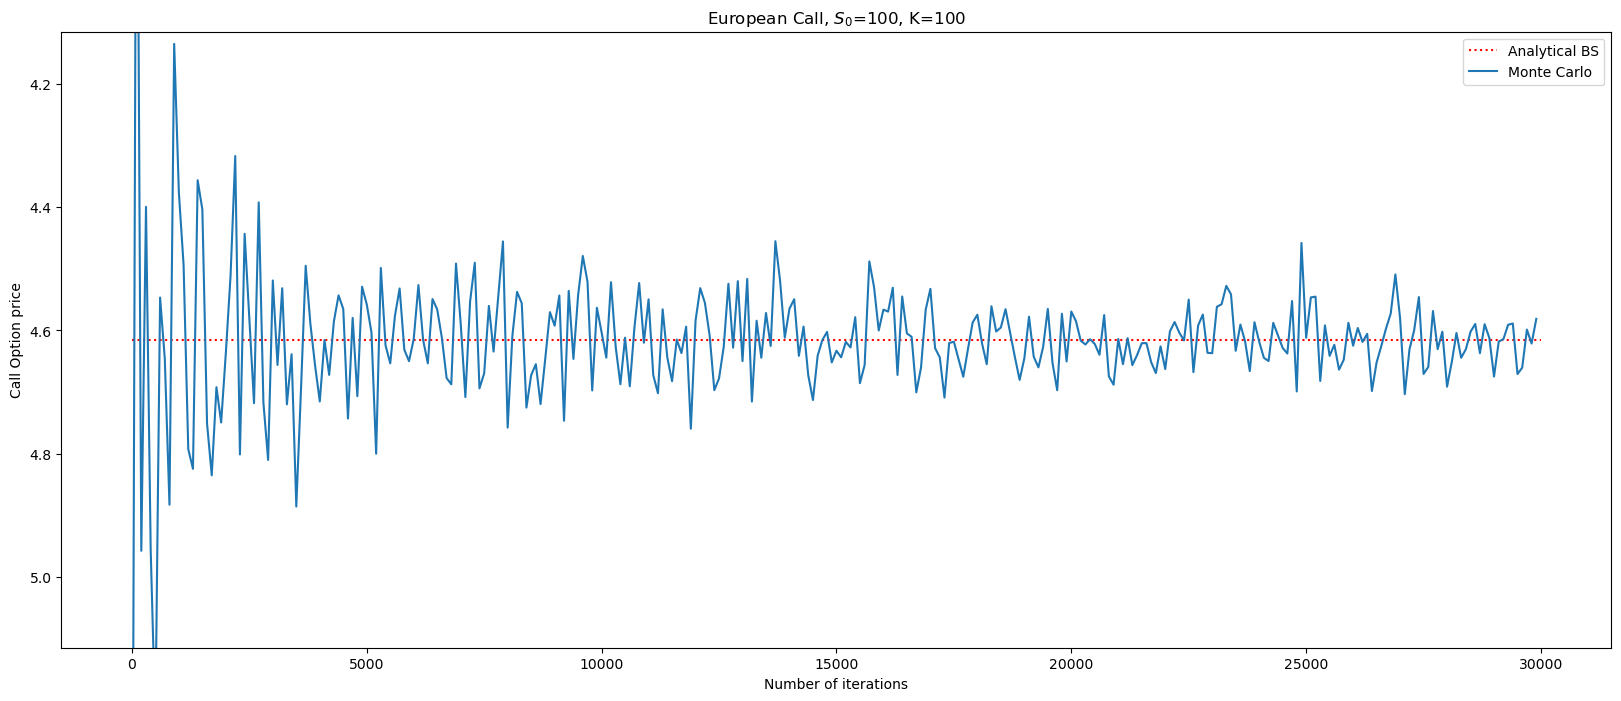

In [118]:
#Next, we will start with illustrating the convergence of option using different iteration. 
np.random.seed(42)
df = pd.DataFrame(columns=["Iter", "BSc"])

for i in range(1, 30000, 100):
    df = pd.concat([
        df,
        pd.DataFrame({"Iter": [i], "BSc": [bs_option_mc(100,100,0.05,0.2,3/12,0,i,"C")]})],ignore_index=True);

plt.figure(figsize=(20, 8))

plt.hlines(
    bs_call_price(100, 0.05, 0.2, 0, 3/12, 100),
    xmin=0,
    xmax=30000,
    linestyle="dotted",
    colors="red",
    label="Analytical BS",
)

plt.plot(df.set_index("Iter"), lw=1.5, label="Monte Carlo")

plt.title("European Call, $S_0$=100, K=100")
plt.xlabel("Number of iterations")
plt.ylabel("Call Option price")
plt.ylim(
    bs_call_price(100, 0.05, 0.2, 0, 3/12, 100) + 0.5,
    bs_call_price(100, 0.05, 0.2, 0, 3/12, 100) - 0.5,
)
plt.legend()
plt.show()

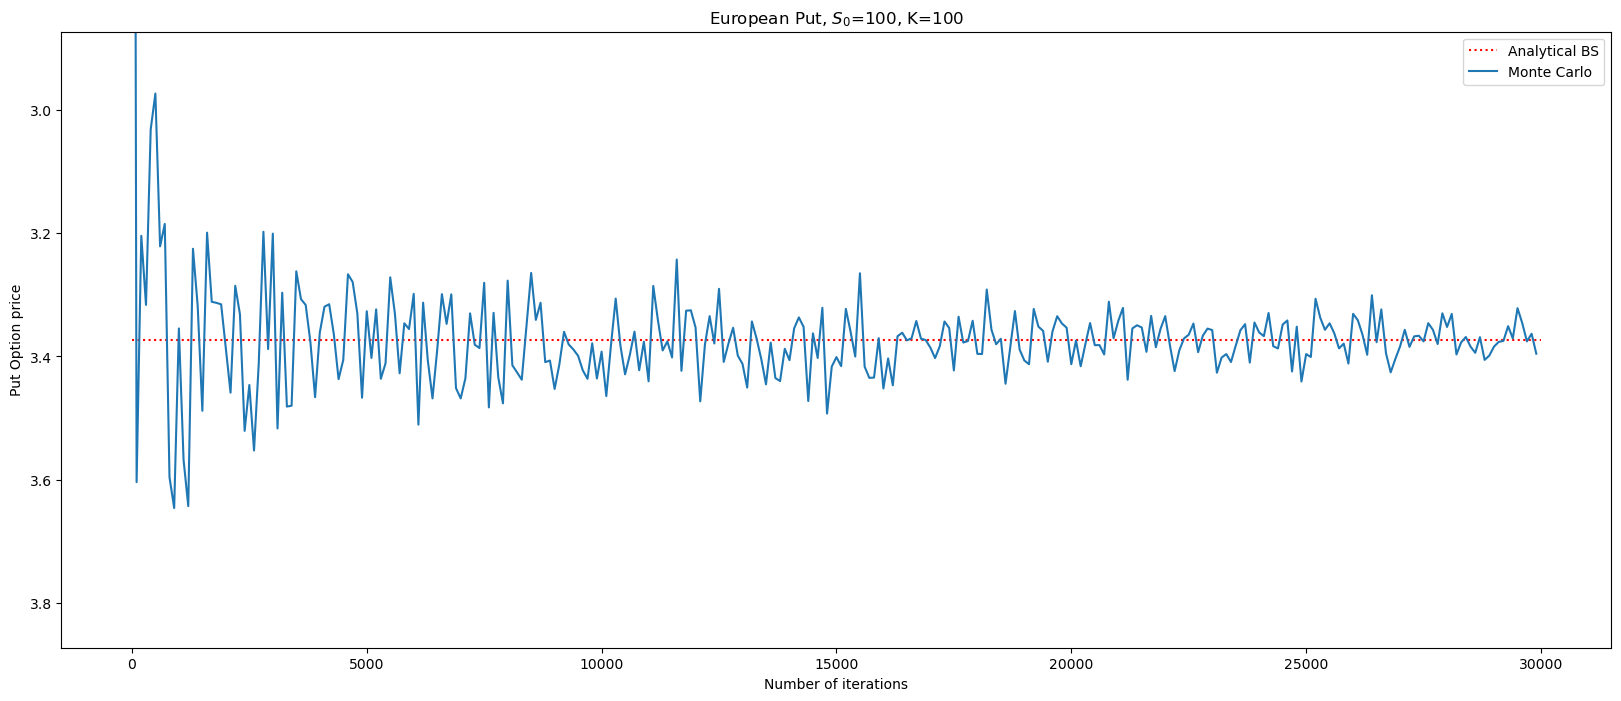

In [120]:
#Next, we will focus on put option.
np.random.seed(42)
df = pd.DataFrame(columns=["Iter", "BSc"])

for i in range(1, 30000, 100):
    df = pd.concat([
        df,
        pd.DataFrame({"Iter": [i], "BSc": [bs_option_mc(100,100,0.05,0.2,3/12,0,i,"P")]})],ignore_index=True);

plt.figure(figsize=(20, 8))

plt.hlines(
   bs_put_price(100, 0.05, 0.2, 0, 3/12, 100),
    xmin=0,
    xmax=30000,
    linestyle="dotted",
    colors="red",
    label="Analytical BS",
)

plt.plot(df.set_index("Iter"), lw=1.5, label="Monte Carlo")

plt.title("European Put, $S_0$=100, K=100")
plt.xlabel("Number of iterations")
plt.ylabel("Put Option price")
plt.ylim(
    bs_put_price(100, 0.05, 0.2, 0, 3/12, 100) + 0.5,
    bs_put_price(100, 0.05, 0.2, 0, 3/12, 100) - 0.5,
)
plt.legend()
plt.show()

In [123]:
#To use $0.20 as benchmark, 

#For European Call Option, we will use iteration = 10,000
bs_call_mc = bs_option_mc(100,100,0.05,0.2,3/12,0,10000,"C")
print("Based on Monte-Carlo methods, the European Call Price is $ {:.2f}".format(bs_call_mc))

#For European Put Option, we will use iteration = 5,000
bs_put_mc = bs_option_mc(100,100,0.05,0.2,3/12,0,5000,"P")
print("Based on Monte-Carlo methods, the European Put Price is $ {:.2f}".format(bs_put_mc))

Based on Monte-Carlo methods, the European Call Price is $ 4.60
Based on Monte-Carlo methods, the European Put Price is $ 3.38


## Volatility increased from 20% to 25%

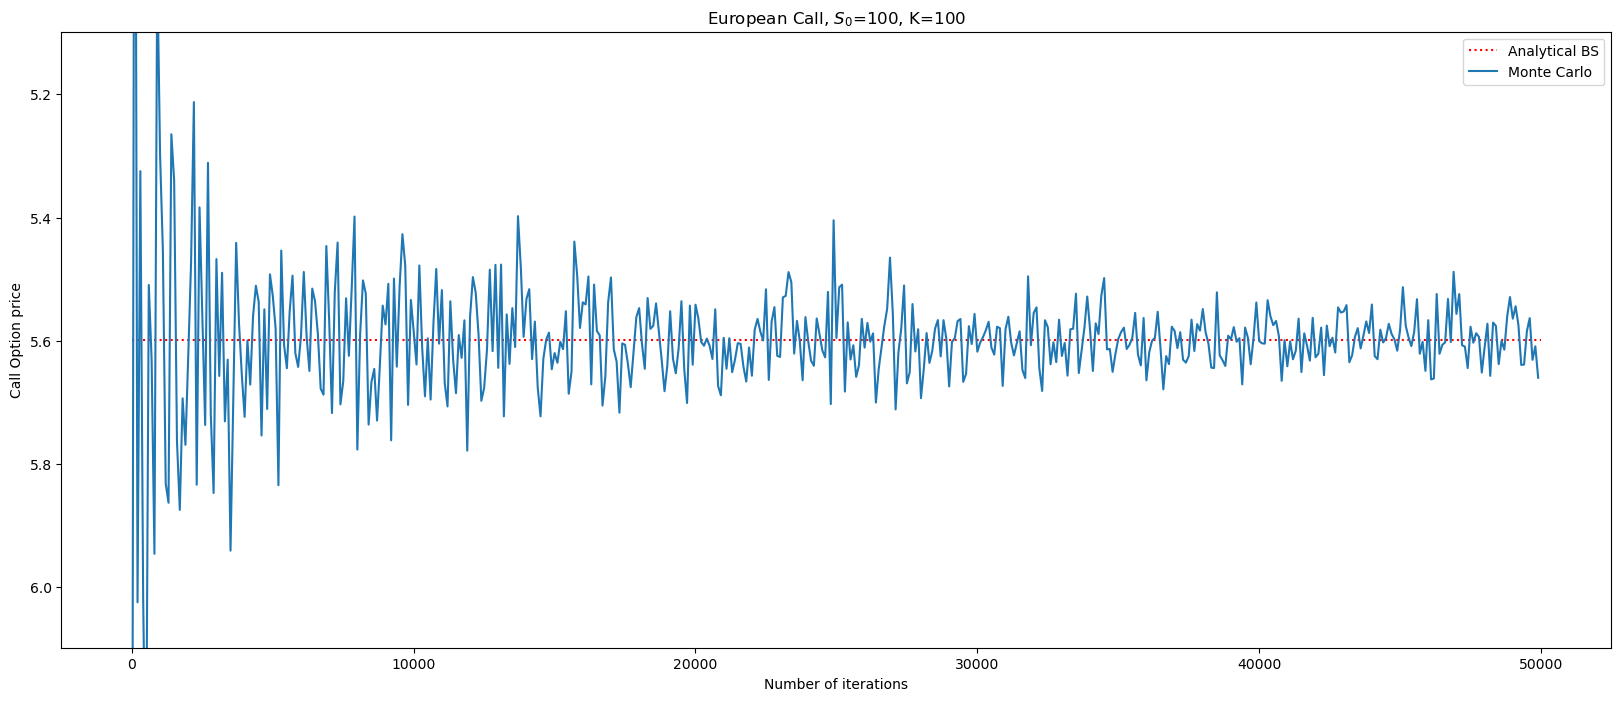

In [125]:
#Next, lets examine if the volatility increased from 20% to 25% 

#We will first review the graph. 

np.random.seed(42)
df = pd.DataFrame(columns=["Iter", "BSc"])

for i in range(1, 50000, 100):
    df = pd.concat([
        df,
        pd.DataFrame({"Iter": [i], "BSc": [bs_option_mc(100,100,0.05,0.25,3/12,0,i,"C")]})],ignore_index=True);

plt.figure(figsize=(20, 8))

plt.hlines(
    bs_call_price(100, 0.05, 0.25, 0, 3/12, 100),
    xmin=0,
    xmax=50000,
    linestyle="dotted",
    colors="red",
    label="Analytical BS",
)

plt.plot(df.set_index("Iter"), lw=1.5, label="Monte Carlo")

plt.title("European Call, $S_0$=100, K=100")
plt.xlabel("Number of iterations")
plt.ylabel("Call Option price")
plt.ylim(
    bs_call_price(100, 0.05, 0.25, 0, 3/12, 100) + 0.5,
    bs_call_price(100, 0.05, 0.25, 0, 3/12, 100) - 0.5,
)
plt.legend()
plt.show()

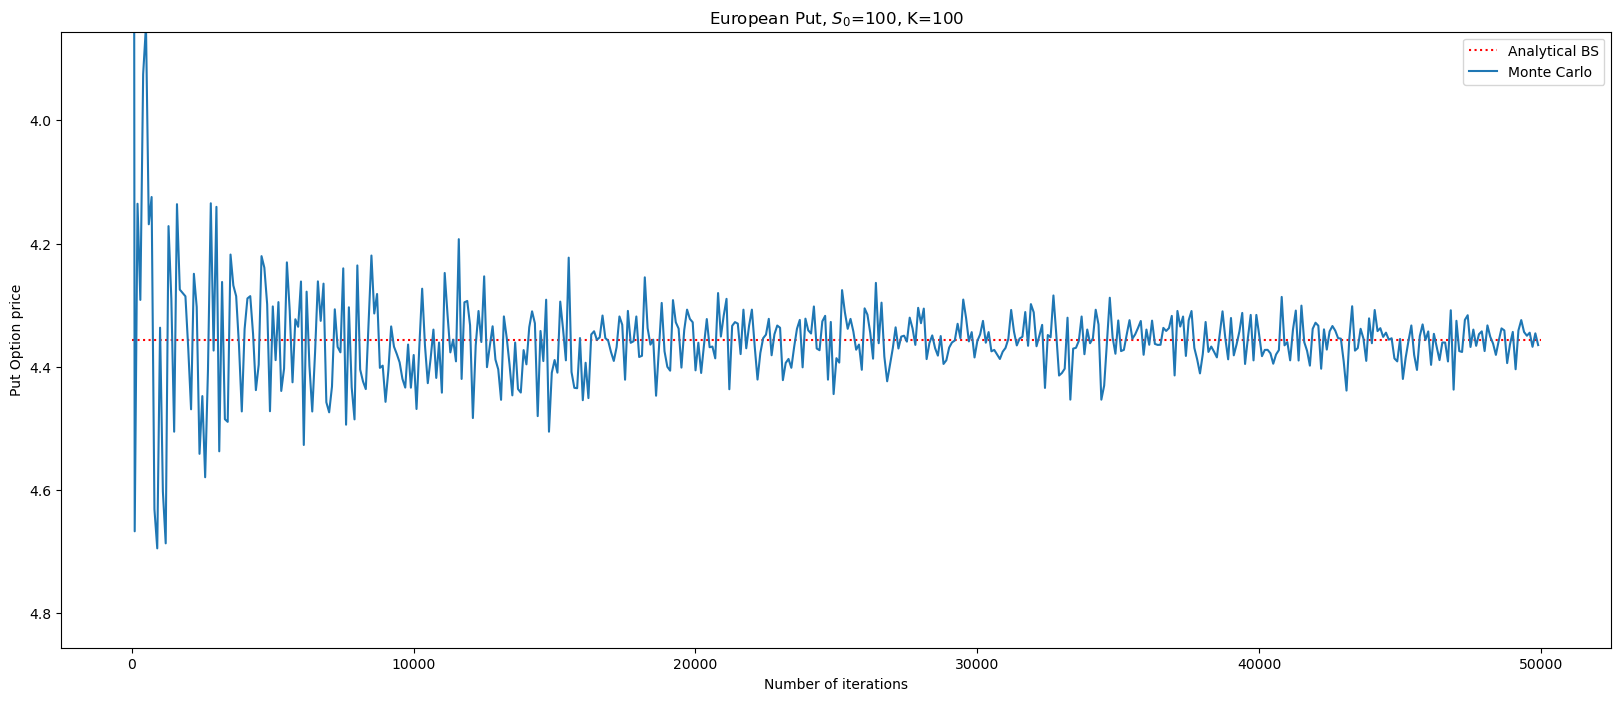

In [126]:
#Next, we will focus on put option.
np.random.seed(42)
df = pd.DataFrame(columns=["Iter", "BSc"])

for i in range(1, 50000, 100):
    df = pd.concat([
        df,
        pd.DataFrame({"Iter": [i], "BSc": [bs_option_mc(100,100,0.05,0.25,3/12,0,i,"P")]})],ignore_index=True);

plt.figure(figsize=(20, 8))

plt.hlines(
   bs_put_price(100, 0.05, 0.25, 0, 3/12, 100),
    xmin=0,
    xmax=50000,
    linestyle="dotted",
    colors="red",
    label="Analytical BS",
)

plt.plot(df.set_index("Iter"), lw=1.5, label="Monte Carlo")

plt.title("European Put, $S_0$=100, K=100")
plt.xlabel("Number of iterations")
plt.ylabel("Put Option price")
plt.ylim(
    bs_put_price(100, 0.05, 0.25, 0, 3/12, 100) + 0.5,
    bs_put_price(100, 0.05, 0.25, 0, 3/12, 100) - 0.5,
)
plt.legend()
plt.show()

In [127]:
#To use $0.20 as benchmark, 

#For European Call Option, we will use iteration = 30,000
bs_call_mc = bs_option_mc(100,100,0.05,0.25,3/12,0,30000,"C")
print("Based on Monte-Carlo methods, the European Call Price is $ {:.2f}".format(bs_call_mc))

#For European Put Option, we will use iteration = 20,000
bs_put_mc = bs_option_mc(100,100,0.05,0.25,3/12,0,20000,"P")
print("Based on Monte-Carlo methods, the European Put Price is $ {:.2f}".format(bs_put_mc))

Based on Monte-Carlo methods, the European Call Price is $ 5.57
Based on Monte-Carlo methods, the European Put Price is $ 4.32


## Q3: Explanation on the European Pricing based on Black-Scholes and Monte-Carlo

# Step 2

## Q4: Monte-Carlo Method with Regular GBM on American Call Option

American Option is given the right to exercise early before the expiration date. 

Given the previous explanaiton, we are modifying some part of the code in Q2 for pricing simulation. 



In [136]:
#American Call Option - Daily Simulation 
np.random.seed(42)
S = 100
K = 100
N = 3 #Daily steps
T = 3/12 #Calculated daysfrom 255 days per year - 3 months
Ite = 10000 #Number of Paths
r = 0.05
sigma = 0.20 
opttype = "C"

def Ame_Opt_MC(S, K, N, T, Ite, r, sigma, opttype):
    t = 0
    dt = 1 #per day
    df = np.exp(-r * dt)   
    #Define Price Path based on Iteration
    z = np.random.normal(0, 1, [1, Ite])
    s = np.zeros((Ite, N+1)) #Create Price Array (2D)
    data = np.zeros((Ite, N+1)) # Payoff Array (2D)
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    s[:,-1] = ST #Price Array (Append at last column)
    if opttype == "C":
        data[:,-1] = np.maximum(ST - K,0) #Payoff Array (Append at last column)
    else:
        data[:,-1] = np.maximum(K - ST,0) #Payoff Array (Append at last column)
    
    for i in range(N-1,0,-1): #to complete all the price and payoff matrix
        ST = S * np.exp((i - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(i - t) * z)
        s[:,i] = ST
        if opttype == "C":
            data[:,i] = np.maximum(ST - K,0)
        else: 
            data[:,i] = np.maximum(K - ST,0)

    #Convert matrix to df
    price = pd.DataFrame(data = s)
    payoff = pd.DataFrame(data = data)
    payoff.index.name = 'Path'
    price.index.name = 'Path'
   
    # Create Cash Flow Matrix 
    cf = payoff.copy()
    cf[:] = 0
    cf.loc[:,N] = payoff.iloc[:,N]

    for i in range(N-1, 0, -1): #i stands for number of steps using backward induction with LSM
        temp_table = pd.DataFrame({"Y":cf.iloc[:,i+1]*df, "X":price.iloc[:,i]})
        if opttype == "C":
            id_inmoney = price[price.iloc[:,i] > K].index #If call, then >K, if Put, then <K
        else:
            id_inmoney = price[price.iloc[:,i] < K].index
        table_inmoney = temp_table.loc[id_inmoney]
    
        rg = np.polyfit(table_inmoney["X"], table_inmoney["Y"],2) #do regression 
        ##print("The Conditional Expectaion function is %.3f + %.3fX %.3fX^2" %(rg_temp[2], rg_temp[1], rg_temp[0]))

        # Calculate continuation value
        ct = np.polyval(rg, price.loc[id_inmoney].iloc[:,i])
        ##Opt_dec_org = pd.DataFrame(data={"Exercise":payoff.loc[id_inmoney_temp, i], "Continution":ct_temp})
        ##Opt_dec = Opt_dec_org.round(2)

        #Make decision point:
        #if continuation is bigger than exercise payoff, we exercise,
        # otherwise continue
        cf.loc[id_inmoney, i] = np.where(payoff.loc[id_inmoney, i] > ct, payoff.loc[id_inmoney, i], 0)

        for ii in range (i, N): # When at any time t>>t+1, we execise, cashflow in rest of steps is equal to zero
            cf.loc[id_inmoney, ii+1] = np.where(cf.loc[id_inmoney, i] > 0, 0, cf.loc[id_inmoney, ii+1])

    DCF = 0 

    for i in range (N, 0, -1):
        DCF = sum(cf.loc[:,i])*np.exp(-dt*r*i) + DCF

    Option_Value = DCF/Ite
    
    #To calculate delta:
    delta = np.zeros((Ite-1, N)) # Array (2D)
    Delta = pd.DataFrame(data = delta)
    Delta.index.name = 'Path'

    for i in range(N-1,-1,-1):
        for j in range(0, Ite-1):
            Delta.loc[j,i] = ((cf.loc[j,i+1] - cf.loc[j+1,i+1])/(price.loc[j,i+1]-price.loc[j+1,i+1]))

    average_delta = Delta.mean()
    
    return cf, Option_Value,average_delta

cf_Acall_output, call_option_price, d = Ame_Opt_MC(S, K, N, T, Ite, r, sigma, opttype)
print(cf_Acall_output)
print("The value of American Call Option (Volatility = 20%) is: $ {:.2f}".format(call_option_price))
print("The average delta (Volatility = 20%) is: {:.3f}".format(d.mean()))


        0    1          2    3
Path                          
0     0.0  0.0  22.200381  0.0
1     0.0  0.0   2.111274  0.0
2     0.0  0.0  27.531599  0.0
3     0.0  0.0  63.358649  0.0
4     0.0  0.0   0.000000  0.0
...   ...  ...        ...  ...
9995  0.0  0.0  53.419718  0.0
9996  0.0  0.0   0.000000  0.0
9997  0.0  0.0   0.000000  0.0
9998  0.0  0.0  22.167599  0.0
9999  0.0  0.0  27.412616  0.0

[10000 rows x 4 columns]
The value of American Call Option (Volatility = 20%) is: $ 16.13
The average delta (Volatility = 20%) is: 0.208


Volatility increased from 20% to 25%

In [137]:
#American Call Option - Daily Simulation 
np.random.seed(42)
S = 100
K = 100
N = 3 #Daily steps
T = 3/12 #Calculated days from 255 days per year - 3 months
Ite = 10000 #Number of Paths
r = 0.05
sigma = 0.25 #Volatility increased from 20% to 25%
opttype = "C"

cf_Acall_output, call_option_price, d = Ame_Opt_MC(S, K, N, T, Ite, r, sigma, opttype)
print(cf_Acall_output)
print("The value of American Call Option (Volatility = 25%) is: $ {:.2f}".format(call_option_price))
print("The average delta (Volatility = 25%) is: {:.3f}".format(d.mean()))

        0    1          2    3
Path                          
0     0.0  0.0  23.752693  0.0
1     0.0  0.0   0.000000  0.0
2     0.0  0.0  30.537777  0.0
3     0.0  0.0  77.885940  0.0
4     0.0  0.0   0.000000  0.0
...   ...  ...        ...  ...
9995  0.0  0.0  64.461949  0.0
9996  0.0  0.0   0.000000  0.0
9997  0.0  0.0   0.000000  0.0
9998  0.0  0.0  23.711196  0.0
9999  0.0  0.0  30.385560  0.0

[10000 rows x 4 columns]
The value of American Call Option (Volatility = 25%) is: $ 18.66
The average delta (Volatility = 25%) is: 0.193


## Q5: Monte-Carlo Method with Regular GBM on American Put Option

In [138]:
#American Put Option - Daily Simulation 
np.random.seed(42)
S = 100
K = 100
N = 3 #Daily steps
T = 3/12 #Calculated daysfrom 255 days per year - 3 months
Ite = 10000 #Number of Paths
r = 0.05
sigma = 0.20
opttype = "P"

cf_Aput_output, put_option_price,d_put = Ame_Opt_MC(S, K, N, T, Ite, r, sigma, opttype)
print(cf_Aput_output)
print("The value of American Put Option (Volatility = 25%) is: $ {:.2f}".format(put_option_price))
print("The average delta (Volatility = 25%) is: {:.3f}".format(d_put.mean()))

        0         1          2         3
Path                                    
0     0.0  0.000000   0.000000  0.000000
1     0.0  0.000000   0.000000  0.630646
2     0.0  0.000000   0.000000  0.000000
3     0.0  0.000000   0.000000  0.000000
4     0.0  1.668983   0.000000  0.000000
...   ...       ...        ...       ...
9995  0.0  0.000000   0.000000  0.000000
9996  0.0  0.000000  39.662556  0.000000
9997  0.0  0.000000  13.020149  0.000000
9998  0.0  0.000000   0.000000  0.000000
9999  0.0  0.000000   0.000000  0.000000

[10000 rows x 4 columns]
The value of American Put Option (Volatility = 25%) is: $ 6.71
The average delta (Volatility = 25%) is: -0.126


Volatility increased from 20% to 25%

In [139]:
#American Put Option - Daily Simulation 
np.random.seed(42)
S = 100
K = 100
N = 3 #Daily steps
T = 3/12 #Calculated daysfrom 255 days per year - 3 months
Ite = 10000 #Number of Paths
r = 0.05
sigma = 0.25
opttype = "P"

cf_Aput_output, put_option_price,d_put = Ame_Opt_MC(S, K, N, T, Ite, r, sigma, opttype)
print(cf_Aput_output)
print("The value of American Put Option (Volatility = 25%) is: $ {:.2f}".format(put_option_price))
print("The average delta (Volatility = 25%) is: {:.3f}".format(d_put.mean()))

        0         1          2    3
Path                               
0     0.0  0.000000   0.000000  0.0
1     0.0  1.569166   0.000000  0.0
2     0.0  0.000000   0.000000  0.0
3     0.0  0.000000   0.000000  0.0
4     0.0  0.000000   4.427563  0.0
...   ...       ...        ...  ...
9995  0.0  0.000000   0.000000  0.0
9996  0.0  0.000000  48.779054  0.0
9997  0.0  0.000000  19.092780  0.0
9998  0.0  0.000000   0.000000  0.0
9999  0.0  0.000000   0.000000  0.0

[10000 rows x 4 columns]
The value of American Put Option (Volatility = 25%) is: $ 9.19
The average delta (Volatility = 25%) is: -0.140


## Q6: Different level of Moneyness

# Step 3

## Q7: Hedging under Black-Scholes for European Options

In [1]:
# Black-Scholes model in Python
import numpy as np
import scipy.stats as ss
def bs_opt_price(S, r, vol, T, K, option_type):

# Data for input in Black-Scholes formula:
# Compute d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)

    if option_type in ["C", "P"]:
        if option_type in ["C"]:
            Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
            Delta = ss.norm.cdf(d1)
            Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
            Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
            Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
                    -r * T
                    ) * ss.norm.cdf(d2)
            Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
        else:
            Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
            Delta = -ss.norm.cdf(-d1)
            Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
            Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
            Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
                    -r * T
                    ) * ss.norm.cdf(-d2)
            Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
    else:
        Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

    return Opt_Price, Delta

In [2]:
Opt1, Delta1 = bs_opt_price(100,0.05,0.2,3/12,110,option_type='C')

In [3]:
Opt2, Delta2 = bs_opt_price(100,0.05,0.2,3/12,95,option_type='P')

In [4]:
print("The price of the European Call option with moneyness of 110% is {:.4f}".format(Opt1))
print("The price of the European Put option with moneyness of 95% is {:.4f}".format(Opt2))
print("The delta of the portfolio will be {:.4f}".format(Delta1+Delta2))
print("The delta of the second portfolio is {:.4f}".format(Delta1-Delta2))

The price of the European Call option with moneyness of 110% is 1.1911
The price of the European Put option with moneyness of 95% is 1.5343
The delta of the portfolio will be -0.0275
The delta of the second portfolio is 0.4640


## Q8: Up-and-Out (UAO) Barrier Option Pricing 

## Q9: Up-and-In (UAI) Barrier Option Pricing